# Importing Libraries

In [22]:
import numpy as np 
import pandas as pd
import plotly
import seaborn as sns
import matplotlib.pyplot as plt


# Importing Data

In [23]:
df = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')

# Reading Data

In [24]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
# Inspecting data types
print(df.dtypes)

# print unique values for each column
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    # Separate each value
    print("-" * 50) 

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
Unique values in App:
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
--------------------------------------------------
Unique values in Category:
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPH

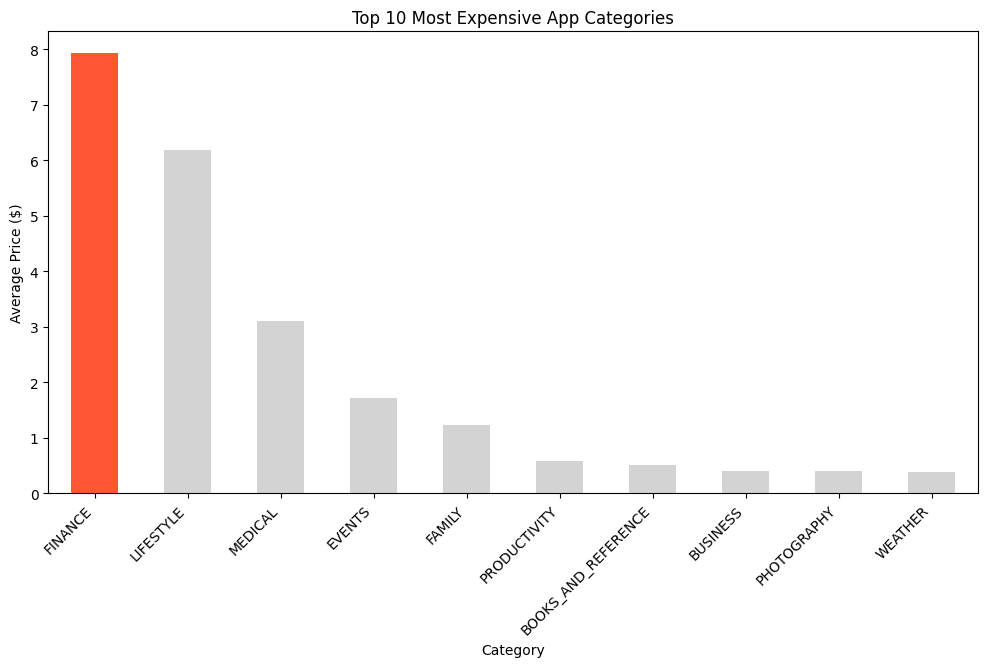

In [33]:
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)

# Step 2 Convert to float, invalid ones will be Null
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Step 3 Drop null rows for price
df = df.dropna(subset=['Price'])

# Step 4 Group by 'Category' and calculate the average price
category_avg_price = df.groupby('Category')['Price'].mean()

# Step 5 Sort categories by average price
category_avg_price = category_avg_price.sort_values(ascending=False)

# Step 6 Filter to only show most expensive 
top_expensive_categories = category_avg_price.head(10)

# Highlight top category
highlight_color = ['#FF5733'] + ['#D3D3D3'] * (len(top_expensive_categories) - 1)

# Plot highlighted color for top category
plt.figure(figsize=(12, 6))
top_expensive_categories.plot(kind='bar', color=highlight_color)
plt.title('Top 10 Most Expensive App Categories')
plt.xlabel('Category')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()